# Batch Normalization

隠れ層において活性化関数適用の前に正規化（標準化）の処理を挟むことで重みが大きくなりすぎて過学習が起こるのを防ぐ。

$$
\begin{eqnarray}
    z_j^{(l)} &=& \displaystyle \sum_{i} w_{i \rightarrow j}^{(l)} a_i^{(l-1)}
        &\qquad& \rm{(0.1)}
    \\
    \hat{z}_j^{(l)} &=& \cfrac{z_j^{(l)} - \mu^{(l)}}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
        &\qquad& \rm{(0.2)}
    \\
    \zeta_j^{(l)} &=& \gamma^{(l)} \hat{z}_j^{(l)} + \beta^{(l)}
        &\qquad& \rm{(0.3)}
    \\
    a_j^{(l)} &=& \phi\left(\zeta_j^{(l)}\right)
        &\qquad& \rm{(0.4)}
\end{eqnarray}
$$

ここで

$$
\begin{eqnarray}
    \mu^{(l)} &\equiv& \cfrac{1}{N^{(l)}} \displaystyle \sum_{k} z_k^{(l)}
        &\qquad& \rm{(0.5)}
    \\
    {\sigma^{(l)}}^2 &\equiv& \cfrac{1}{N^{(l)}} \displaystyle \sum_{k} \left( z_k^{(l)} - \mu^{(l)} \right)^2
        &\qquad& \rm{(0.6)}
\end{eqnarray}
$$

$$N^{(l)}$$ は第 $$l$$ 層のノードの数。

# 勾配の計算

最適化すべきパラメータとして、重み以外に $$\gamma, \beta$$ が加わる。

コスト関数

$$
J = J(W, \gamma, \beta)
$$

の勾配 = 各パラメータによる偏微分を求める。

## ガンマの勾配

$$
\begin{eqnarray}
    \cfrac{\partial J}{\partial \gamma^{(l)}}
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{\partial \zeta_k^{(l)}}{\partial \gamma^{(l)}}
    \\
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \hat{z}_k^{(l)}
    \qquad \rm{(1.1)}
\end{eqnarray}
$$

## ベータの勾配

$$
\begin{eqnarray}
    \cfrac{\partial J}{\partial \beta^{(l)}}
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{\partial \zeta_k^{(l)}}{\partial \beta^{(l)}}
    \\
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
    \qquad \rm{(1.2)}
\end{eqnarray}
$$

## 重みの勾配

$$
\begin{eqnarray}
    \cfrac{\partial J}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{\partial \zeta_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    \\
    &=&
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{\partial \zeta_k^{(l)}}{\partial \hat{z}_k^{(l)}}
        \cfrac{\partial \hat{z}_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    \\
    &=&
    \gamma^{(l)} \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{\partial \hat{z}_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    \qquad \rm{(1.3)}
\end{eqnarray}
$$

$$\hat{z}_k^{(l)}$$ の表式に含まれる変数のうち $$z_k^{(l)}, \mu^{(l)}, \sigma^{(l)}$$ は $$w_{i \rightarrow j}^{(l)}$$ の関数。

$$\rm{(0.1), (0.5), (0.6)}$$ より、

$$
\begin{eqnarray}
    \cfrac{\partial z_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \begin{cases}
        a_i^{(l-1)} &\quad& \rm{if}\ j = k
        \\
        0 &\quad& \rm{if}\ j \neq k
    \end{cases}
    \\
    &=&
    E_{jk} a_i^{(l-1)}
    &\qquad& \rm{(1.4)}
    \\
    \cfrac{\partial \mu^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \cfrac{1}{N^{(l)}} \displaystyle \sum_{k} \cfrac{\partial z_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    \\
    &=&
    \cfrac{a_i^{(l-1)}}{N^{(l)}}
    &\qquad& \rm{(1.5)}
    \\
    \cfrac{\partial {\sigma^{(l)}}^2}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \cfrac{1}{N^{(l)}} \displaystyle \sum_{k}
        2 \left( z_k^{(l)} - \mu^{(l)} \right)
        \cfrac{\partial \left( z_k^{(l)} - \mu^{(l)} \right)}{\partial w_{i \rightarrow j}^{(l)}}
    \\
    &=&
    \cfrac{2}{N^{(l)}} \displaystyle \sum_{k}
        \left( z_k^{(l)} - \mu^{(l)} \right)
        a_i^{(l-1)} \left( E_{jk} - \cfrac{1}{N^{(l)}} \right)
    \\
    &=&
    \cfrac{2 a_i^{(l-1)}}{N^{(l)}} \displaystyle
        \left(
            \sum_{k} E_{jk} z_k^{(l)}
            - \mu^{(l)} \sum_{k} E_{jk}
            - \cfrac{1}{N^{(l)}} \sum_{k} z_k^{(l)}
            + \cfrac{\mu^{(l)}}{N^{(l)}} \sum_{k} 1
        \right)
    \\
    &=&
    \cfrac{2 a_i^{(l-1)}}{N^{(l)}}
        \left(
            z_j^{(l)} - \mu^{(l)} - \mu^{(l)} + \cfrac{\mu^{(l)}}{N^{(l)}} N^{(l)}
        \right)
    \\
    &=&
    \cfrac{2 a_i^{(l-1)}}{N^{(l)}}
        \left( z_j^{(l)} - \mu^{(l)} \right)
    &\qquad& \rm{(1.6)}
\end{eqnarray}
$$

したがって、

$$
\begin{eqnarray}
    \cfrac{\partial \hat{z}_k^{(l)}}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \cfrac{1}{{\sigma^{(l)}}^2 + \epsilon}
    \left(
        \sqrt{{\sigma^{(l)}}^2 + \epsilon}
            \cfrac{\partial \left( z_k^{(l)} - \mu^{(l)} \right) }{\partial w_{i \rightarrow j}^{(l)}}
        - \left( z_k^{(l)} - \mu^{(l)} \right)
            \cfrac{\partial \sqrt{{\sigma^{(l)}}^2 + \epsilon} }{\partial w_{i \rightarrow j}^{(l)}}
    \right)
    \\
    &=&
    \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \left(
        \cfrac{\partial \left( z_k^{(l)} - \mu^{(l)} \right) }{\partial w_{i \rightarrow j}^{(l)}}
        - \hat{z}_k^{(l)}
            \cfrac{\partial \sqrt{{\sigma^{(l)}}^2 + \epsilon} }{\partial w_{i \rightarrow j}^{(l)}}
    \right)
    \\
    &=&
    \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \left(
        E_{jk} a_i^{(l-1)} - \cfrac{a_i^{(l-1)}}{N^{(l)}}
        - \hat{z}_k^{(l)}
            \cfrac{1}{2 \sqrt{{\sigma^{(l)}}^2 + \epsilon}}
            \cfrac{2 a_i^{(l-1)}}{N^{(l)}}
            \left( z_j^{(l)} - \mu^{(l)} \right)
    \right)
    \\
    &=&
    \cfrac{a_i^{(l-1)}}{N^{(l)}} \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \left( N^{(l)} E_{jk} - 1 - \hat{z}_k^{(l)} \hat{z}_j^{(l)} \right)
    \qquad \rm{(1.7)}
\end{eqnarray}
$$

$$\rm{(1.7)}$$ を $$\rm{(1.3)}$$ へ代入して、

$$
\begin{eqnarray}
    \cfrac{\partial J}{\partial w_{i \rightarrow j}^{(l)}}
    &=&
    \gamma^{(l)} \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \cfrac{a_i^{(l-1)}}{N^{(l)}} \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
        \left( N^{(l)} E_{jk} - 1 - \hat{z}_k^{(l)} \hat{z}_j^{(l)} \right)
    \\
    &=&
    \gamma^{(l)} \cfrac{a_i^{(l-1)}}{N^{(l)}} \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \displaystyle \sum_{k}
        \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        \left( N^{(l)} E_{jk} - 1 - \hat{z}_k^{(l)} \hat{z}_j^{(l)} \right)
    \\
    &=&
    \gamma^{(l)} \cfrac{a_i^{(l-1)}}{N^{(l)}} \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \displaystyle
    \left(
        N^{(l)} \sum_{k} \cfrac{\partial J}{\partial \zeta_k^{(l)}} E_{jk}
        - \sum_{k} \cfrac{\partial J}{\partial \zeta_k^{(l)}}
        - \hat{z}_j^{(l)} \sum_{k} \cfrac{\partial J}{\partial \zeta_k^{(l)}} \hat{z}_k^{(l)}
    \right)
    \\
    &=&
    \gamma^{(l)} \cfrac{a_i^{(l-1)}}{N^{(l)}} \cfrac{1}{\sqrt{{\sigma^{(l)}}^2 + \epsilon}}
    \displaystyle
    \left(
        N^{(l)} \cfrac{\partial J}{\partial \zeta_j^{(l)}}
        - \cfrac{\partial J}{\partial \beta^{(l)}}
        - \hat{z}_j^{(l)} \cfrac{\partial J}{\partial \gamma^{(l)}}
    \right)
    \qquad \rm{(1.8)}
\end{eqnarray}
$$

In [2]:
import numpy
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot(classifier, data, labels, title=None, xlabel=None, ylabel=None):
    unique_labels = np.unique(labels)
    colors = ['red', 'blue', 'green', 'orange', 'cyan'][:len(unique_labels)]
    x1max, x1min = np.max(data[:, 0]), np.min(data[:, 0])
    x2max, x2min = np.max(data[:, 1]), np.min(data[:, 1])
    scale_x1 = x1max - x1min
    scale_x2 = x2max - x2min
    x1max, x1min = x1max + (x1max-x1min)*0.05, x1min - (x1max-x1min)*0.05
    x2max, x2min = x2max + (x2max-x2min)*0.05, x2min - (x2max-x2min)*0.05
    resolution = scale_x1 / 200
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = np.array([classifier.predict(x) for x in np.array([xx1.ravel(), xx2.ravel()]).T])
    z = z.reshape(xx1.shape)
    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors))
    
    data_of_each_label = {}
    for d, l in zip(data, labels):
        if l in data_of_each_label:
            data_of_each_label[l].append(d)
        else:
            data_of_each_label[l] = [d]
    
    for i in range(len(unique_labels)):
        data = data_of_each_label[unique_labels[i]]
        plt.scatter(np.array(data)[:, 0], np.array(data)[:, 1], s=5, c=colors[i])

In [88]:
import numpy as np

class MLPBatchNormClassifier:
    eps = 1e-4
    """
    多層パーセプトロン（MLP）による分類器
    - 隠れ層の活性化関数：シグモイド関数 / 双曲線正接関数 / LeRU 関数
    - 出力層の活性化関数：ソフトマックス関数
    
    Attributes
    ----------
    h_layers : int
        隠れ層の数
    h_units : int
        隠れ層のユニットの個数（バイアスを除く）
    epochs : int
        繰り返し回数
    eta : float
        学習率
    n_batch : int
        ミニバッチ学習のバッチサイズ
    l2 : float
        L2正則化の強さ（ラムダパラメータ）
    n : int
        教師データの件数
    m : inti
        入力の次元
    t : int
        分類ラベルの種類数
    W : list[numpy array]
        各層の重み行列を格納する配列
        - 入力層 -> 隠れ層の重み (h x (m+1))
        - 隠れ層 -> 隠れ層の重み (h x (h+1))
        - 隠れ層 -> 出力層の重み (t x (h+1))
    mse : list[float]
        エポック毎の平均二乗誤差（Mean Squared Errors）を格納するリスト
    cost : list[float]
        エポック毎のコスト関数の値を格納するリスト
    mode : string
        隠れ層の活性化関数の種類
    activation : method
        隠れ層の活性化関数
    debug_grad : bool
        True の場合は勾配チェックを行う
    debug_activation_hist : bool
        True の場合は各ステップ・各隠れ層の出力のヒストグラムを計算する
    grad_relative_err : list[float]
        勾配チェックの結果（相対誤差）を格納するリスト
    A_hist : list[list[numpy.histogram]]
        各ステップ・各隠れ層の出力のヒストグラムを格納するリスト
    """
    
    def __init__(self, h_layers, h_units, epochs, eta, n_batch, l2=1.0, mode='tanh', debug_grad=False, debug_activation_hist=False):
        self.h_layers = h_layers
        self.h_units = h_units
        self.epochs = epochs
        self.eta = eta
        self.n_batch = n_batch
        self.l2 = l2
        self.debug_grad = debug_grad
        self.debug_activation_hist = debug_activation_hist
        self.grad_relative_err = []
        self.A_hist = []
        activation_functions = {
            'sigmoid': ActivationFuncSigmoid(),
            'tanh': ActivationFuncHyperbolicTangent(),
            'relu': ActivationFuncReLU()
        }
        if mode in activation_functions:
            self.mode = mode
            self.activation = activation_functions[mode]
        else:
            raise Exception('Mode \'{}\' does not exist.\nAvailable modes: {}'.format(', '.join(activation_functions.keys())))
    
    def fit(self, data, labels):
        self.index2label = np.unique(labels)
        self.label2index = {self.index2label[i]: i for i in range(len(self.index2label))}
        self.n = len(data)
        self.m = len(data[0])
        self.t = len(self.index2label)
        
        self.__initialize_weight()
        
        X = np.full([self.m+1, self.n], 1.0)
        X[1:] = data.T
        Y = np.zeros([self.t, self.n])
        for i in range(self.n):
            l = labels[i]
            Y[self.label2index[l]][i] = 1.0
        
        self.mse = []
        self.cost = []
        for _ in range(self.epochs):
            # ミニバッチ法による学習
            ids = np.random.choice(range(self.n), self.n_batch, replace=False)
            X_part = X[:, ids]
            Y_part = Y[:, ids]
            A, Z, Z_norm, Z_new = self.__forward_prop(X_part, self.W)
            mse = np.sum((Y_part - A[-1])**2) / self.n_batch
            self.mse.append(mse)
            cost = self.__cost(Y_part, A[-1], self.W)
            self.cost.append(cost)
            if mse < 0.001:
                break
            self.__back_prop(A, Z, Z_norm, Z_new, X_part, Y_part)
        return
        
    def predict(self, d):
        """
        Parameters
        ----------
        d : 予測したいデータ
        """
        x = np.full(len(d)+1, 1.0)
        x[1:] = d
        y = self.__forward_prop(x.reshape(-1,1), self.W)[0][-1]
        i_label = np.argmax(y)
        return self.index2label[i_label]
    
    def __forward_prop(self, X, W):
        """
        順伝播法により各層の出力を計算
        """
        n = len(X[0])
        A = [X]
        Z = []
        Z_norm = []
        Z_new = []
        for i in range(self.h_layers):
            Z.append(np.dot(W[i], A[i]))
            Z_norm.append((Z[-1] - np.average(Z[-1], axis=0))/(np.std(Z[-1], axis=0) + self.eps))
            Z_new.append(self.gamma[i] * Z_norm[-1] + self.beta[i])
            A.append(np.full([self.h_units+1, n], 1.0))
            A[-1][1:] = self.activation.phi(Z_new[-1])
        Z.append(np.dot(W[-1], A[-1]))
        A.append(self.__softmax(Z[-1]))
        if self.debug_activation_hist:
            self.A_hist.append([])
            for A_ in A[1:-1]:
                self.A_hist[-1].append(np.histogram(A_[1:], bins=20))
        return A, Z, Z_norm, Z_new
    
    def __back_prop(self, A, Z, Z_norm, Z_new, X, Y):
        """
        誤差逆伝播法により重みを更新
        """
        d = self.__differentiate_cost_by_z(Y, A[-1])
        grad = [np.dot(d, A[-2].T)]
        grad_gamma = []
        grad_beta = []
        for i in range(1, self.h_layers+1):
            act_grad = self.activation.grad(Z_new[-i])
            grad_zeta = np.dot(self.W[-i].T[1:], d) * act_grad
            grad_gamma.append(np.sum(grad_zeta * Z_norm[-i]))
            grad_beta.append(np.sum(grad_zeta))
            tmp = np.dot(self.W[-i].T[1:], d) * act_grad
            tmp2 = self.gamma[-i] / (np.std(Z[-i-1], axis=0) + self.eps) / self.h_units
            #d = self.h_units * np.eye(self.h_units) - np.full((self.h_units, self.h_units), 1.0) - np.dot(np.matrix())
            d = tmp2 * (
                self.h_units * tmp -
                np.sum(tmp, axis=0) -
                Z_norm[-i] * np.sum(tmp * Z_norm[-i], axis=0)
            )
            
            g_w = np.dot(
                grad_zeta * self.h_units - grad_beta[-1] - Z_norm[-i] * grad_gamma[-1],
                (tmp2 * A[-i-2]).T
            )
            grad.append(g_w)
                        
            #d = np.dot(self.W[-i].T[1:], d) * self.activation.grad(Z[-i-1])
            
            #grad.append(np.dot(d, A[-i-2].T))
            #grad_gamma.append()
            #grad_beta.append()
        grad.reverse()
        grad_gamma.reverse()
        grad_beta.reverse()
        
        # 正則化項の勾配
        for i in range(len(grad)):
            grad[i] += self.l2 * self.W[i]
        for i in range(self.h_layers):
            grad_gamma[i] += self.l2 * self.gamma[i]
            grad_beta[i] += self.l2 * self.beta[i]
        
        # 勾配チェック
        if self.debug_grad:
            self.__gradient_check(X, Y, self.W, grad)
        
        # 重みを更新
        for i in range(self.h_layers+1):
            self.W[i] -= self.eta * grad[i]
        # ガンマ, ベータを更新
        for i in range(self.h_layers):
            self.gamma[i] -= self.eta * grad_gamma[i]
            self.beta[i] -= self.eta * grad_beta[i]
            
        #raise Exception(str(g_w))
        
        return
    
    def __softmax(self, z):
        exp = np.exp(z)
        return exp / np.sum(exp, axis=0)
    
    def __cost(self, Y, Y_pred, W):
        """
        コスト関数を計算する
        具体的には、実現確率（対数尤度）にマイナスをかけたもの
        """
        cost = np.sum(-Y * np.log(Y_pred) - (1.0-Y) * np.log(1.0-Y_pred))
        # 正則化項
        for l in range(len(W)):
            cost += np.sum(W[l]**2) * self.l2 / 2.0
        return cost
    
    def __differentiate_cost_by_z(self, Y, Y_pred):
        tmp = (Y_pred - Y) / (1 - Y_pred)
        d = tmp - Y_pred * np.sum(tmp, axis=0)
        return d
    
    def __initialize_weight(self):
        self.W = []
        self.W.append(np.random.rand(self.h_units, self.m+1))
        for i in range(self.h_layers-1):
            self.W.append(np.random.randn(self.h_units, self.h_units+1) * 0.01)
        self.W.append(np.random.rand(self.t, self.h_units+1))
        self.gamma = [1.0] * self.h_layers
        self.beta = [0.0] * self.h_layers
        """
        if self.mode == 'relu':
            self.W.append(np.random.normal(loc=0, scale=np.sqrt(2.0/(self.m+1)), size=(self.h_units, self.m+1)))
            for i in range(self.h_layers-1):
                self.W.append(np.random.normal(loc=0, scale=np.sqrt(2.0/(self.h_units+1)), size=(self.h_units, self.h_units+1)))
            self.W.append(np.random.normal(loc=0, scale=np.sqrt(2.0/(self.h_units+1)), size=(self.t, self.h_units+1)))
        elif self.mode == 'sigmoid' or self.mode == 'tanh':
            self.W.append(np.random.normal(loc=0, scale=np.sqrt(1.0/(self.m+1)), size=(self.h_units, self.m+1)))
            for i in range(self.h_layers-1):
                self.W.append(np.random.normal(loc=0, scale=np.sqrt(1.0/(self.h_units+1)), size=(self.h_units, self.h_units+1)))
            self.W.append(np.random.normal(loc=0, scale=np.sqrt(1.0/(self.h_units+1)), size=(self.t, self.h_units+1)))
        else:
            self.W.append(np.random.rand(self.h_units, self.m+1))
            for i in range(self.h_layers-1):
                self.W.append(np.random.rand(self.h_units, self.h_units+1))
            self.W.append(np.random.rand(self.t, self.h_units+1))
        """
        
    def __gradient_check(self, X, Y, W, grad):
        """
        デバッグ用のメソッド
        数値的に求めた勾配と解析的に求めた勾配を比べる
        相対誤差（relative_err）が小さい（ゼロに近い）ほど良い
        """
        ep = 1e-5
        num_grad = []
        for i in range(len(W)):
            g = np.zeros(W[i].shape)
            ep_arr = np.zeros(W[i].shape)
            for j in range(W[i].shape[0]):
                for k in range(W[i].shape[1]):
                    ep_arr[j][k] = ep
                    W_ = [np.copy(w) for w in W]
                    W_[i] += ep_arr
                    A, Z = self.__forward_prop(X, W_)
                    cost1 = self.__cost(Y, A[-1], W_)
                    W_ = [np.copy(w) for w in W]
                    W_[i] -= ep_arr
                    A, Z = self.__forward_prop(X, W_)
                    cost2 = self.__cost(Y, A[-1], W_)
                    g[j][k] = (cost1-cost2)/ep/2.0
                    ep_arr[j][k] = 0
            num_grad.append(g)
        v_num_grad= np.hstack(tuple([g.flatten() for g in num_grad]))
        v_grad = np.hstack(tuple([g.flatten() for g in grad]))
        relative_err = np.linalg.norm(v_num_grad-v_grad) / (np.linalg.norm(v_num_grad) + np.linalg.norm(v_grad))
        self.grad_relative_err.append(relative_err)


class ActivationFuncSigmoid:
    def phi(self, z):
        return 1.0 / (1.0 + np.exp(-z))
        
    def grad(self, z):
        sig = self.phi(z)
        return sig * (1.0 - sig)
    
class ActivationFuncHyperbolicTangent:
    def phi(self, z):
        return np.tanh(z)
        
    def grad(self, z):
        cosh = np.cosh(z)
        return 1.0 / cosh**2
        
class ActivationFuncReLU:
    def phi(self, z):
        ret = np.zeros(z.shape)
        i_x_arr, i_y_arr = np.where(z > 0)
        for i_x, i_y in zip(i_x_arr, i_y_arr):
            ret[i_x][i_y] = z[i_x][i_y]
        return ret
        
    def grad(self, z):
        ret = np.zeros(z.shape)
        i_x_arr, i_y_arr = np.where(z > 0)
        for i_x, i_y in zip(i_x_arr, i_y_arr):
            ret[i_x][i_y] = 1.0
        return ret

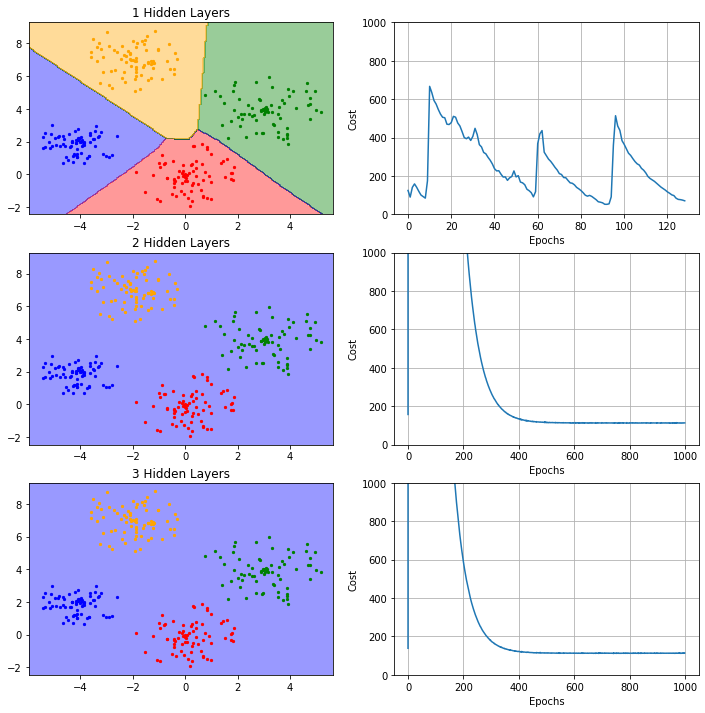

In [93]:
%matplotlib inline
from matplotlib import pyplot as plt

def circle(c_, R_, n_):
    r = R_ * np.random.rand(n_)
    theta = np.random.rand(n_) * 2 * np.pi
    data = np.array([r * np.sin(theta) + c_[0], r * np.cos(theta) + c_[1]]).T
    return data

N = 300
data = np.concatenate([
    circle([0, 0], 2, N//4),
    circle([-4, 2], 1.5, N//4),
    circle([3, 4], 2.5, N//4),
    circle([-2, 7], 2, N//4)
])
labels = np.concatenate([
    np.full(N//4, 0),
    np.full(N//4, 1),
    np.full(N//4, 2),
    np.full(N//4, 3)
])

# 決定領域の描画
plt.figure(figsize=(12, 12))
for i in range(3):
    mlp = MLPBatchNormClassifier(h_layers=i+1, h_units=11, epochs=1000, eta=0.01, n_batch=50, mode='relu')
    mlp.fit(data, labels)
    plt.subplot(3, 2, 2*i+1)
    plt.title('{} Hidden Layers'.format(i+1))
    # 決定領域描画のための自作関数
    plot(mlp, data, labels)
    plt.subplot(3, 2, 2*i+2)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(range(len(mlp.cost)), mlp.cost)
    plt.grid()
plt.show()